<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [22]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [6]:
boston_df.drop(['Unnamed: 0'],axis=1,inplace=True)
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Q1: Median Value of owner occupied home

Text(0.5, 1.0, 'Median value of owner occupied home')

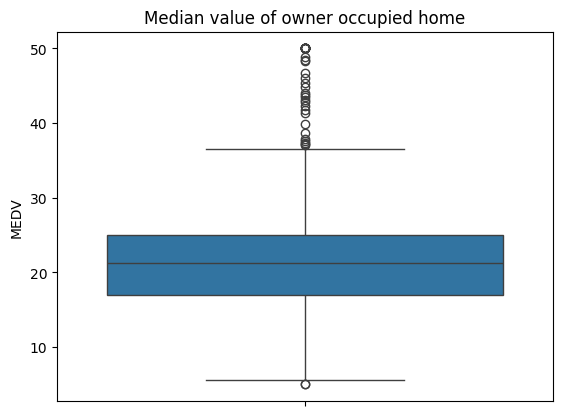

In [8]:
ax=sns.boxplot(y='MEDV', data=boston_df)
ax.set_title("Median value of owner occupied home")

## Q2: Bar Plot for "charles river variable"

Text(0.5, 1.0, '# of Homes near Charles river')

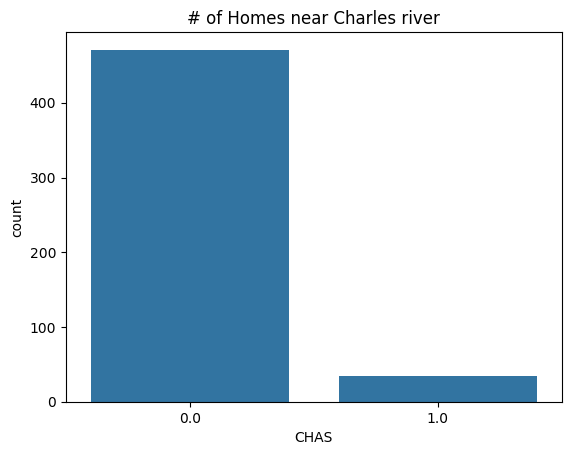

In [9]:
ax1=sns.countplot(x='CHAS', data=boston_df)
ax1.set_title("# of Homes near Charles river")

# Q3: BoxPlot for "MEDV valiabale vs the Age variable"

Text(0.5, 1.0, 'Median value  vs The Age')

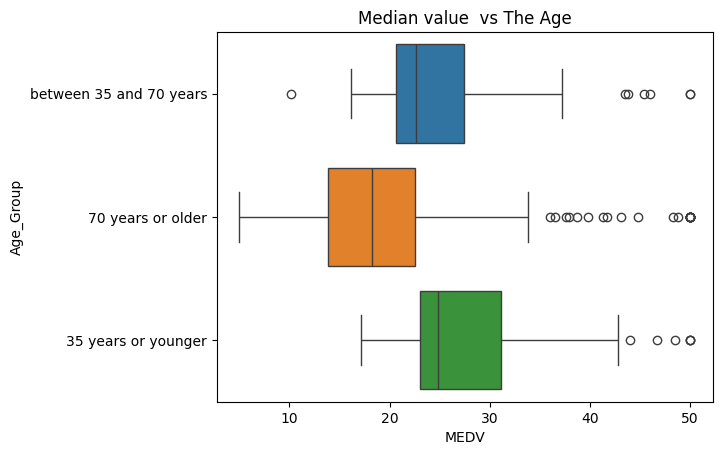

In [10]:
boston_df.loc[(boston_df['AGE']<=35),'Age_Group']="35 years or younger"
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'Age_Group'] ="between 35 and 70 years"
boston_df.loc[(boston_df['AGE']>=70),'Age_Group']= '70 years or older'

#plot
ax2=sns.boxplot(x='MEDV',y='Age_Group' , hue= 'Age_Group', data=boston_df)
ax2.set_title("Median value  vs The Age")

# Q4: Scatter plot

Text(0.5, 1.0, '# of Nitric oxide concentration and proportion of  non-retail business ares per town')

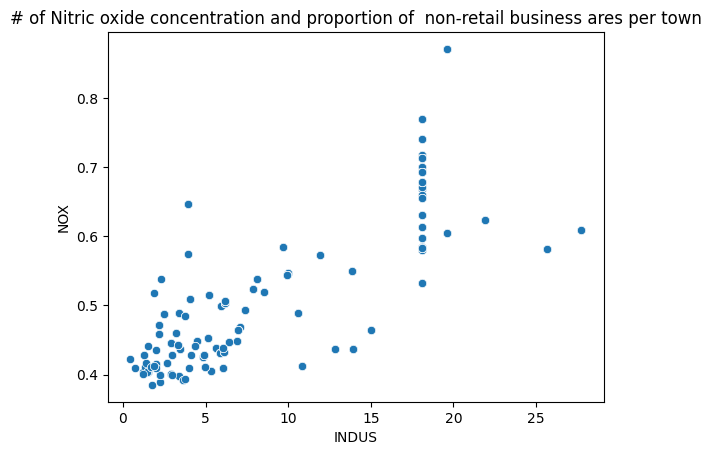

In [11]:
ax3=sns.scatterplot(y='NOX',x='INDUS', data=boston_df)
ax3.set_title("# of Nitric oxide concentration and proportion of  non-retail business ares per town")

### Note: from the graph it looks like there is a linear dependence of NOX  vs. INDUS a. NOX poplution is linked to an increasing proportion of industrial zones

# Q5 Hostrogram: Pupil to Teacher ratio

Text(0.5, 1.0, '#Pupil to teacher Ration distribution')

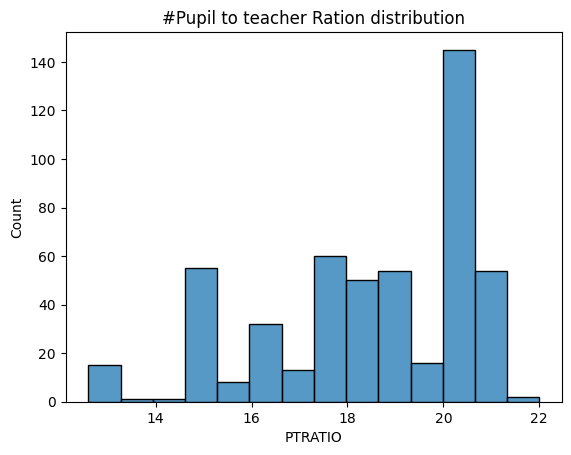

In [13]:
ax4=sns.histplot(x='PTRATIO', data=boston_df)
ax4.set_title("#Pupil to teacher Ration distribution")

# Q6: Is there a significant difference in median value of houses bounded by the charles river or not?
### Hypothesis:
- Null Hypothesis: there is no significant diffenece in median value between houses bounded and not bounded by the charles river
- Alternate hypothesis: there's significant difference in median values between houses bounded and not bounded by the charles river
#### alpha=0.05

In [18]:
boston_df.loc[(boston_df['CHAS']==0),'CHAS_Cat']="FAR"
boston_df.loc[(boston_df['CHAS']==1) ,'CHAS_Cat'] ="NEAR"
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group,CHAS_Cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,FAR
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years or older,FAR
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,FAR
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,FAR
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,FAR


In [19]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_Cat']=='FAR']['MEDV'],
                      boston_df[boston_df['CHAS_Cat']=="NEAR"]['MEDV'],equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

### - Conclusion : given the p value is less than 0.05, we reject the null hypothesis and Area bounded by the charles river have homes with higher median prices

# Q7: Is there a diffenece in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940(ANOVA)
### Hypothesis-
- Null hypothesis: there is no significant difference in median values of houses(MEDV) for each proportion of owner occupied units built prior to 1940
-  Alternate hypothsesis: there is significant difference
#### alpha=0.05

In [23]:
lm=ols('MEDV~AGE', data=boston_df).fit()
table=sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


### Conclusion: since these is sgnificant value of F static  we fail to reject the null hypothesis and conclude that age does not have significant diffenec in MEDV.

# Q8 Can we conclude that there is no relationship between Nitric acid concentartions and proportions of non-retail business acres per town ?( pearson correlation)
- Null Hypothesis: Nitric oxide concentration is not correlqatde with the proportions of non-retailbusiness acres per town.
- Alternate Hypothesis: it is correlated with porportions of non retail business acres per town
  ### alpha=0.05

In [24]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### Conclusion: since P values is <<0.05 , we reject the null hypothesis and cconclude that NOX and INDUS are correlated with R= .746

# Q9: Impact of an additional weighted distance to the five boston employment centeres on the median value of owner occupied homes?
Hypoythsis:
Alpha=0.05
- H0: DIS variable has no impact on home median price
- H1: DIS variable has impact on home median price 

In [28]:
x= boston_df['DIS']
y=boston_df['MEDV']


In [29]:
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
pred=model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        21:01:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

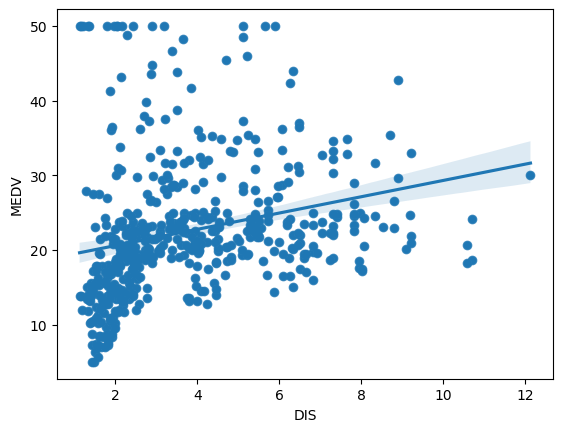

In [31]:
ax6=sns.scatterplot(x='DIS',y='MEDV',data=boston_df)
ax6=sns.regplot(x='DIS', y='MEDV', data=boston_df)


### Conclusion: since f-static is very low we reject the null hypothesis and conclude that  tehse is an impact of DIS variable on MEDV which also evident from the scatter plot above